In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from sklearn.decomposition import PCA
import os
import sys
import util

In [18]:
import importlib
importlib.reload(util)

import matplotlib
importlib.reload(matplotlib)
plt = matplotlib.pyplot

<module 'util' from '/Users/mazighlahiani/Desktop/portofolio_construction/binance/code_base/binance-public-data/python/util.py'>

In [19]:
all_df, all_open, train, test = util.load_train_dataset()

Symbols :  ['YOYOBNB', 'SUBETH', 'WABIETH', 'KMDETH', 'ELFETH', 'XMRETH', 'LSKBTC', 'VENBNB', 'MCOBTC', 'ARNBTC', 'STORJBTC', 'TNTBTC', 'VENETH', 'OSTBTC', 'WABIBNB', 'YOYOETH', 'ETCBTC', 'NULSBNB', 'BATBTC', 'CMTETH', 'LENDBTC', 'NEOBNB', 'DASHBTC', 'NEOETH', 'BTCUSDT', 'XRPETH', 'CDTBTC', 'ASTETH', 'CMTBNB', 'NULSETH', 'ARKBTC', '.DS_Store', 'IOTABNB', 'MTLETH', 'AIONETH', 'IOTAETH', 'FUELBTC', 'ENGETH', 'SNGLSBTC', 'KNCBTC', 'POEBTC', 'BCPTETH', 'DGDETH', 'MANAETH', 'ICXBNB', 'EVXETH', 'BTSETH', 'SALTBTC', 'BTSBNB', 'MTHETH', 'BNTETH', 'QTUMETH', 'XLMBTC', 'ICXETH', 'BCPTBNB', 'ZRXETH', 'GASBTC', 'GTOBTC', 'FUNBTC', 'MODETH', 'AMBBTC', 'XVGETH', 'TRXBTC', 'POWRBNB', 'LRCETH', 'CNDBTC', 'TNBBTC', 'ADXBTC', 'RDNBTC', 'ENJBTC', 'PPTBTC', 'SNMBTC', 'BCDETH', 'POWRETH', 'BCCBTC', 'BNBETH', 'LINKBTC', 'ZECBTC', 'XZCBTC', 'SNTBTC', 'ICNETH', 'EOSBTC', 'GXSETH', 'WAVESBNB', 'HSRETH', 'WAVESETH', 'DNTETH', 'QSPBTC', 'REQETH', 'WTCBTC', 'ADABTC', 'LTCETH', 'OAXETH', 'BTGBTC', 'BQXETH', 'DLTET

/Users/mazighlahiani/Desktop/portofolio_construction/binance/code_base/binance-public-data/python/util.py:51: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if(last_date_symbol > last_date):


ADAETH 2023-06-30 23:00:00 2017-11-30 12:00:00 48804
ADXETH 2023-06-30 23:00:00 2017-11-29 03:00:00 48837
BATETH 2023-06-30 23:00:00 2017-11-13 11:00:00 49213
BNBETH 2023-06-30 23:00:00 2017-08-09 09:00:00 51512
BNTETH 2023-06-30 23:00:00 2017-07-27 00:00:00 51833
DASHETH 2023-06-30 23:00:00 2017-10-20 04:00:00 49796
ELFETH 2023-06-30 23:00:00 2017-12-21 03:00:00 48309
ENJETH 2023-06-30 23:00:00 2017-11-03 03:00:00 49461
EOSETH 2023-06-30 23:00:00 2017-07-27 00:00:00 51843
ETCETH 2023-06-30 23:00:00 2017-10-12 09:00:00 49983
ETHBTC 2023-06-30 23:00:00 2017-07-14 04:00:00 52151
ETHUSDT 2023-06-30 23:00:00 2017-08-17 04:00:00 51325
FUNETH 2023-06-30 23:00:00 2017-09-28 04:00:00 50334
IOTAETH 2023-06-30 23:00:00 2017-09-30 09:00:00 50271
LINKETH 2023-06-30 23:00:00 2017-09-28 08:00:00 50320
LRCETH 2023-06-30 23:00:00 2017-09-01 04:00:00 49743
LSKETH 2023-06-30 23:00:00 2017-11-22 09:00:00 49009
LTCETH 2023-06-30 23:00:00 2017-12-13 03:00:00 48501
MANAETH 2023-06-30 23:00:00 2017-11-24 02:

In [20]:
train.head()

,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,...,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
OpenTime,,,,,,,,,,,,,,,,,,,,,
2017-12-21 03:00:00,0.000626,0.002198,0.000473,0.006692,0.005600,1.90431,0.003000,0.000139,0.013998,0.049187,...,0.001573,0.070570,0.000236,0.000064,0.020343,0.000333,0.58778,0.001135,0.000195,0.83159
2017-12-21 04:00:00,0.000644,0.002292,0.000460,0.006693,0.005764,1.83499,0.001220,0.000147,0.014073,0.048771,...,0.001537,0.070534,0.000239,0.000070,0.019710,0.000344,0.57654,0.001170,0.000198,0.82102
2017-12-21 05:00:00,0.000611,0.002110,0.000444,0.006498,0.005679,1.76980,0.001050,0.000146,0.013598,0.047805,...,0.001474,0.068215,0.000230,0.000078,0.018861,0.000325,0.55213,0.001118,0.000177,0.80594
2017-12-21 06:00:00,0.000592,0.002124,0.000447,0.006390,0.005800,1.74000,0.001154,0.000145,0.013912,0.048053,...,0.001489,0.067700,0.000227,0.000076,0.018819,0.000323,0.54972,0.001133,0.000180,0.82101
2017-12-21 07:00:00,0.000589,0.002285,0.000455,0.006600,0.005805,1.76672,0.001498,0.000140,0.014018,0.050752,...,0.001453,0.069311,0.000222,0.000073,0.019001,0.000322,0.55937,0.001092,0.000179,0.82815


In [30]:
df = train
corr = df.corr()
pca = PCA(n_components=10)
pca.fit(corr)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)
corr.style.background_gradient(cmap='coolwarm')

[8.65187583e-01 1.00567269e-01 1.36314448e-02 8.42282473e-03
 4.63361418e-03 2.94030491e-03 2.06738879e-03 9.65278185e-04
 6.33744028e-04 3.09648887e-04]
[0.86518758 0.96575485 0.9793863  0.98780912 0.99244274 0.99538304
 0.99745043 0.99841571 0.99904945 0.9993591 ]
[12.81196309  4.36806275  1.60816825  1.26412326  0.93760621  0.74689014
  0.62628444  0.42794385  0.34675081  0.24237917]


,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,ETHBTC,ETHUSDT,FUNETH,IOTAETH,LINKETH,LRCETH,LSKETH,LTCETH,MANAETH,MTLETH,NEOETH,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
ADAETH,1.000000,0.226709,-0.216861,0.075710,0.207694,-0.024812,0.053306,0.296081,-0.231220,-0.118061,0.316285,0.442723,0.195723,0.064895,-0.164298,0.102145,0.089178,-0.236378,0.048764,0.178354,-0.025549,0.097985,0.152038,0.137152,-0.192384,0.141780,-0.040469,-0.246151,-0.134144,0.208960,-0.051717
ADXETH,0.226709,1.000000,0.314508,-0.654890,0.790973,0.837887,0.802949,-0.187228,0.509375,0.502409,-0.028843,-0.423529,0.879679,0.877291,-0.280845,0.654848,0.906641,0.495310,-0.370603,0.886121,0.833186,0.884219,0.954596,0.892512,0.464567,0.481701,0.584727,0.640577,0.587525,0.916235,0.797925
BATETH,-0.216861,0.314508,1.000000,-0.267593,0.350620,0.628203,0.404411,0.262532,0.854558,0.629571,-0.711251,-0.672632,0.252731,0.513532,0.086065,-0.009899,0.343932,0.859729,-0.311252,0.219125,0.466696,0.494556,0.343219,0.445097,0.777520,0.420632,0.631178,0.760859,0.769501,0.289599,0.587097
BNBETH,0.075710,-0.654890,-0.267593,1.000000,-0.731531,-0.656354,-0.679558,0.388854,-0.501470,-0.454406,0.199600,0.466886,-0.678341,-0.691600,-0.026385,-0.576271,-0.700284,-0.396352,0.507726,-0.558933,-0.745048,-0.645307,-0.654442,-0.705464,-0.365585,-0.388719,-0.582230,-0.603606,-0.495822,-0.615852,-0.707918
BNTETH,0.207694,0.790973,0.350620,-0.731531,1.000000,0.755523,0.857404,-0.175833,0.588040,0.530500,-0.088892,-0.466356,0.850329,0.838684,-0.194968,0.691127,0.821626,0.422578,-0.360430,0.701183,0.802415,0.817445,0.765827,0.842171,0.496448,0.449275,0.746139,0.648781,0.589933,0.763843,0.836527
DASHETH,-0.024812,0.837887,0.628203,-0.656354,0.755523,1.000000,0.853073,-0.206637,0.836508,0.815849,-0.325881,-0.648509,0.815807,0.948105,-0.305858,0.448608,0.891688,0.788708,-0.429327,0.789902,0.863211,0.913282,0.887156,0.874281,0.709837,0.530827,0.805509,0.899106,0.827799,0.838089,0.957491
ELFETH,0.053306,0.802949,0.404411,-0.679558,0.857404,0.853073,1.000000,-0.301605,0.726960,0.671777,-0.000254,-0.494512,0.907818,0.903851,-0.474234,0.710479,0.903341,0.542032,-0.318066,0.803540,0.868210,0.897776,0.840357,0.878952,0.598576,0.444611,0.773970,0.713906,0.657474,0.829413,0.894348
ENJETH,0.296081,-0.187228,0.262532,0.388854,-0.175833,-0.206637,-0.301605,1.000000,-0.061877,-0.190767,-0.201229,0.230013,-0.341138,-0.254300,0.260173,-0.233598,-0.296288,0.045009,0.283379,-0.243403,-0.257733,-0.180087,-0.273638,-0.188588,-0.030125,0.037731,-0.191997,-0.189086,-0.119034,-0.247633,-0.280021
EOSETH,-0.231220,0.509375,0.854558,-0.501470,0.588040,0.836508,0.726960,-0.061877,1.000000,0.806787,-0.545447,-0.735297,0.546550,0.772940,-0.183548,0.245157,0.610269,0.900608,-0.412051,0.474079,0.700991,0.701424,0.577521,0.656737,0.856548,0.491472,0.810946,0.895972,0.864104,0.531999,0.824641
ETCETH,-0.118061,0.502409,0.629571,-0.454406,0.530500,0.815849,0.671777,-0.190767,0.806787,1.000000,-0.348211,-0.608807,0.598186,0.730165,-0.291587,0.148220,0.661247,0.689537,-0.373698,0.511611,0.685114,0.687368,0.602224,0.634234,0.651623,0.360632,0.739894,0.818302,0.742577,0.554035,0.812046


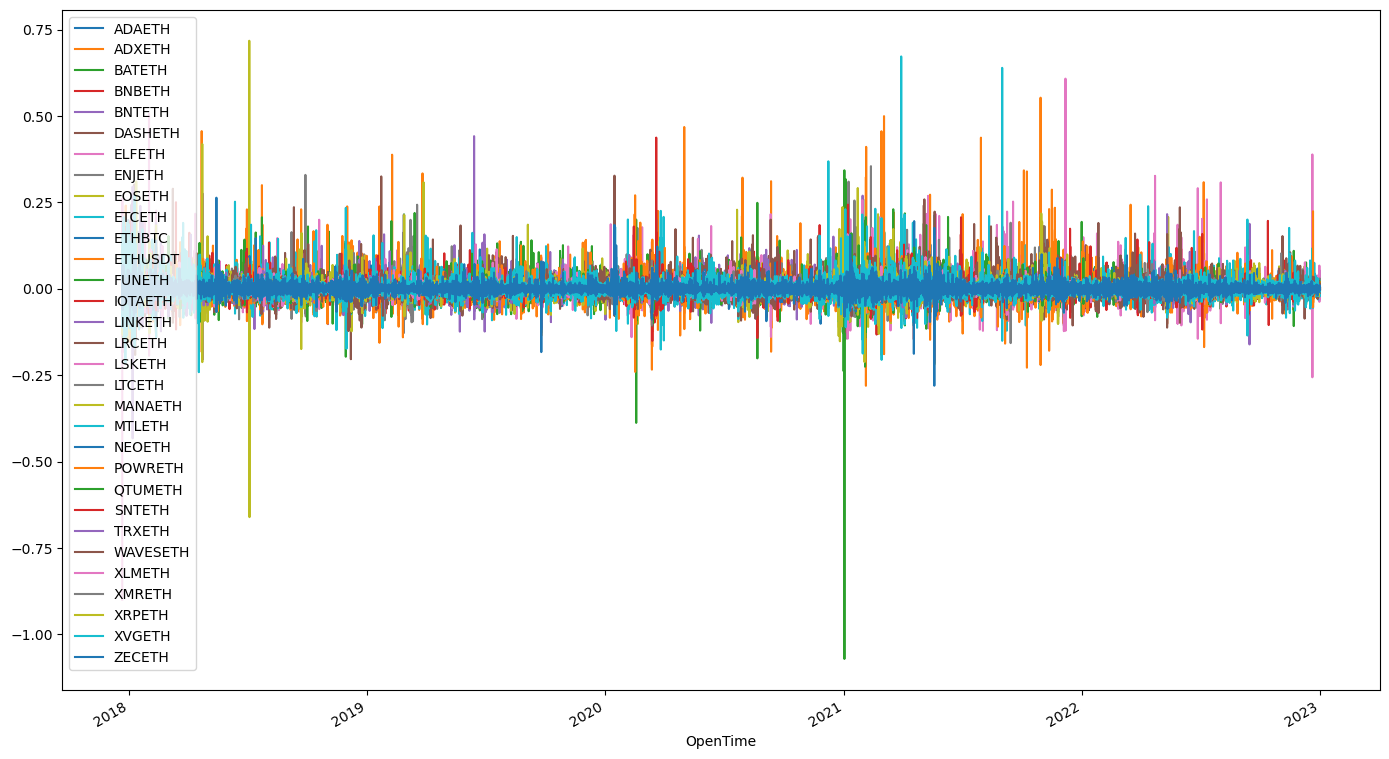

,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,ETHBTC,ETHUSDT,FUNETH,IOTAETH,LINKETH,LRCETH,LSKETH,LTCETH,MANAETH,MTLETH,NEOETH,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
ADAETH,1.000000,0.143176,0.238072,0.256335,0.121894,0.256735,0.170914,0.184275,0.308051,0.241841,-0.233847,-0.066196,0.136857,0.303137,0.217850,0.176192,0.184170,0.285000,0.181900,0.179686,0.338982,0.193935,0.297526,0.288593,0.293193,0.204417,0.452229,0.260481,0.327791,0.187906,0.250884
ADXETH,0.143176,1.000000,0.167497,0.157054,0.093870,0.128909,0.135736,0.135690,0.119756,0.109076,-0.185476,-0.095896,0.111914,0.146039,0.111530,0.103510,0.156082,0.121841,0.144195,0.162087,0.146251,0.158098,0.131412,0.138507,0.138478,0.128842,0.146166,0.152994,0.118560,0.123812,0.126456
BATETH,0.238072,0.167497,1.000000,0.211612,0.138262,0.224689,0.154928,0.220474,0.198427,0.182904,-0.174256,-0.084003,0.119229,0.247469,0.202744,0.190785,0.183454,0.193002,0.240968,0.177779,0.263734,0.179949,0.228147,0.173581,0.192822,0.196056,0.249952,0.221556,0.184611,0.164965,0.225483
BNBETH,0.256335,0.157054,0.211612,1.000000,0.113680,0.247946,0.148622,0.169572,0.214017,0.206174,-0.359596,-0.240920,0.145062,0.247508,0.183408,0.153353,0.193054,0.247836,0.154934,0.154753,0.244821,0.164754,0.218975,0.168017,0.223492,0.203507,0.237931,0.266088,0.217658,0.153752,0.208306
BNTETH,0.121894,0.093870,0.138262,0.113680,1.000000,0.106277,0.087686,0.121634,0.108888,0.085895,-0.121820,-0.089860,0.092306,0.126910,0.126824,0.104581,0.113913,0.100804,0.107693,0.098249,0.135439,0.101504,0.114351,0.103055,0.104208,0.108453,0.116491,0.125358,0.095289,0.090279,0.104425
DASHETH,0.256735,0.128909,0.224689,0.247946,0.106277,1.000000,0.146954,0.174927,0.290690,0.306129,-0.303790,-0.169157,0.113394,0.287717,0.192965,0.154409,0.208910,0.342128,0.178416,0.161897,0.307274,0.155416,0.285649,0.177984,0.220770,0.213778,0.263809,0.375041,0.245323,0.167400,0.441256
ELFETH,0.170914,0.135736,0.154928,0.148622,0.087686,0.146954,1.000000,0.138852,0.153118,0.117907,-0.152497,-0.082740,0.110198,0.172389,0.123156,0.136319,0.150927,0.135801,0.127888,0.156337,0.181974,0.237594,0.157114,0.160672,0.151125,0.142536,0.150643,0.154466,0.101369,0.128061,0.129919
ENJETH,0.184275,0.135690,0.220474,0.169572,0.121634,0.174927,0.138852,1.000000,0.159178,0.157455,-0.126597,-0.033213,0.103532,0.215509,0.165131,0.168188,0.166626,0.145933,0.257159,0.164548,0.209640,0.168113,0.182501,0.147975,0.162838,0.165579,0.195463,0.179108,0.135915,0.157955,0.174391
EOSETH,0.308051,0.119756,0.198427,0.214017,0.108888,0.290690,0.153118,0.159178,1.000000,0.338544,-0.242499,-0.085317,0.112214,0.266653,0.173701,0.150118,0.193387,0.365847,0.155891,0.157207,0.355726,0.149616,0.347869,0.193255,0.291767,0.180568,0.310702,0.249111,0.310540,0.158455,0.270831
ETCETH,0.241841,0.109076,0.182904,0.206174,0.085895,0.306129,0.117907,0.157455,0.338544,1.000000,-0.189764,-0.065999,0.086827,0.246963,0.178033,0.137075,0.176904,0.299990,0.158773,0.135154,0.317644,0.119269,0.307907,0.152400,0.206503,0.171894,0.262904,0.246752,0.241529,0.146950,0.275699


In [110]:
# df_returns = (df - df.shift(1))/df.shift(1)
# df_returns = df_returns[1:]

df_returns = np.log((df/df.shift(1)))
df_returns = df_returns[1:]
df_returns.plot(figsize=(17, 10))
plt.show()

corr = df_returns.corr()
corr.style.background_gradient(cmap='coolwarm')

[0.40399228 0.06295788 0.04333874 0.03528811 0.03074984 0.02663243
 0.02594958 0.02500168 0.02349873 0.02296809]


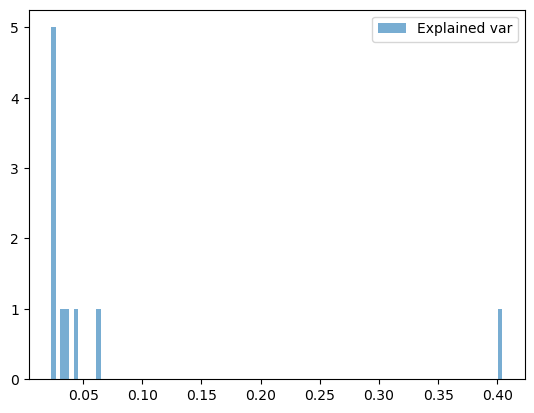

[0.40399228 0.46695015 0.51028889 0.545577   0.57632684 0.60295927
 0.62890885 0.65391053 0.67740926 0.70037736]
[3.63967837 1.43681721 1.19210528 1.07569875 1.00414842 0.93450552
 0.9224475  0.90544295 0.87780619 0.86783859]


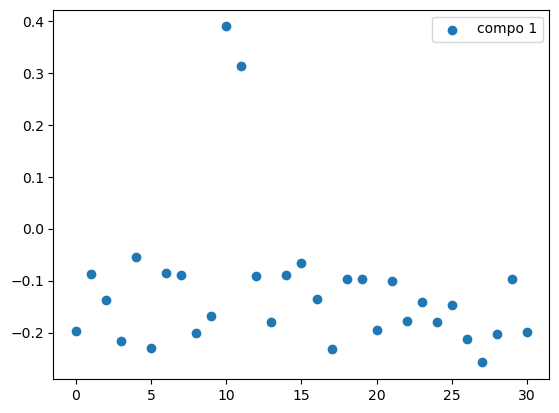

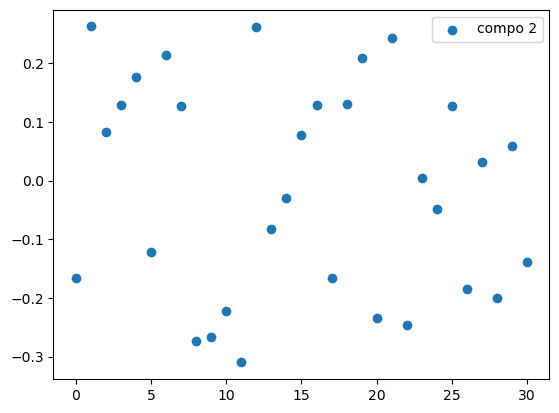

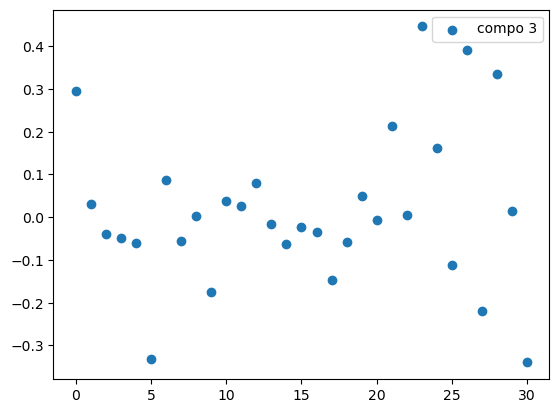

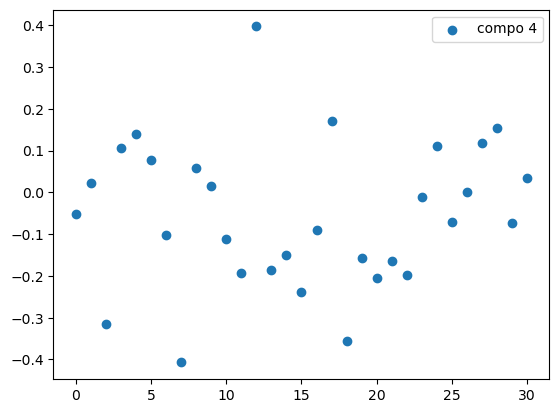

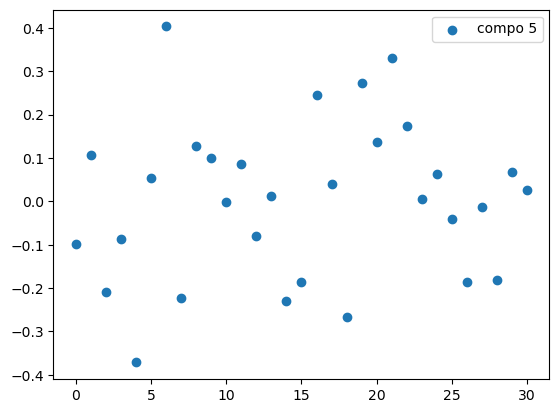

In [111]:

pca = PCA(n_components=10)
pca.fit(corr)
print(pca.explained_variance_ratio_)

plt.hist( pca.explained_variance_ratio_, label ='Explained var', alpha=0.6, bins=100)
plt.legend()
plt.show()

print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)

plt.scatter(range(0, 31), pca.components_[0], label ='compo 1')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[1], label ='compo 2')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[2], label ='compo 3')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[3], label ='compo 4')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[4], label ='compo 5')
plt.legend()
plt.show()

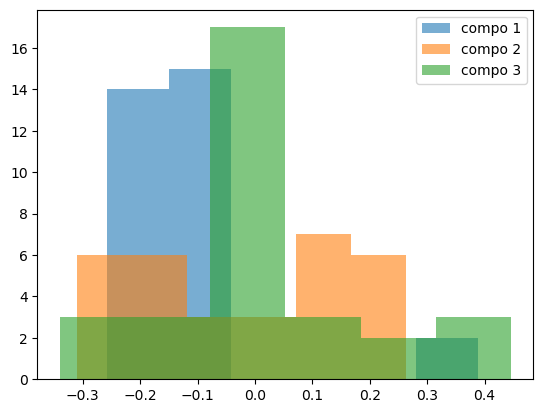

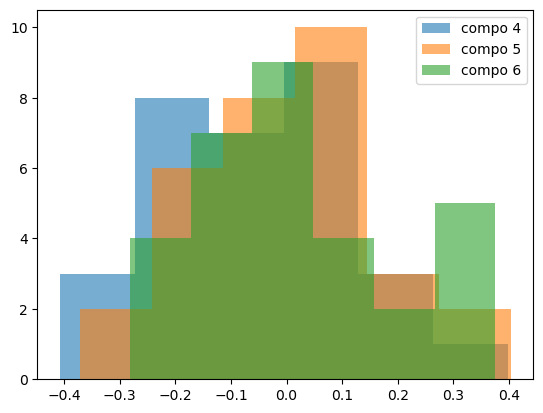

In [112]:
plt.hist( pca.components_[0], label ='compo 1', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[1], label ='compo 2', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[2], label ='compo 3', alpha=0.6, bins='sqrt')
plt.legend()
plt.show()
plt.hist( pca.components_[3], label ='compo 4', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[4], label ='compo 5', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[5], label ='compo 6', alpha=0.6, bins='sqrt')
plt.legend()
plt.show()

In [52]:
pos = pca.components_[1] > 0
neg = pca.components_[1] < 0

print('Pos comp : ', corr.columns[pos])
print('Neg comp : ', corr.columns[neg])

Pos comp :  Index(['ADXETH', 'BATETH', 'BNBETH', 'BNTETH', 'ELFETH', 'ENJETH', 'FUNETH',
       'LRCETH', 'LSKETH', 'MANAETH', 'MTLETH', 'POWRETH', 'SNTETH',
       'WAVESETH', 'XMRETH', 'XVGETH'],
      dtype='object')
Neg comp :  Index(['ADAETH', 'DASHETH', 'EOSETH', 'ETCETH', 'ETHBTC', 'ETHUSDT', 'IOTAETH',
       'LINKETH', 'LTCETH', 'NEOETH', 'QTUMETH', 'TRXETH', 'XLMETH', 'XRPETH',
       'ZECETH'],
      dtype='object')


In [53]:
train

,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,...,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
OpenTime,,,,,,,,,,,,,,,,,,,,,
2017-12-21 03:00:00,0.000626,0.002198,0.000473,0.006692,0.005600,1.90431,0.003000,0.000139,0.013998,0.049187,...,0.001573,0.070570,0.000236,0.000064,0.020343,0.000333,0.58778,0.001135,0.000195,0.83159
2017-12-21 04:00:00,0.000644,0.002292,0.000460,0.006693,0.005764,1.83499,0.001220,0.000147,0.014073,0.048771,...,0.001537,0.070534,0.000239,0.000070,0.019710,0.000344,0.57654,0.001170,0.000198,0.82102
2017-12-21 05:00:00,0.000611,0.002110,0.000444,0.006498,0.005679,1.76980,0.001050,0.000146,0.013598,0.047805,...,0.001474,0.068215,0.000230,0.000078,0.018861,0.000325,0.55213,0.001118,0.000177,0.80594
2017-12-21 06:00:00,0.000592,0.002124,0.000447,0.006390,0.005800,1.74000,0.001154,0.000145,0.013912,0.048053,...,0.001489,0.067700,0.000227,0.000076,0.018819,0.000323,0.54972,0.001133,0.000180,0.82101
2017-12-21 07:00:00,0.000589,0.002285,0.000455,0.006600,0.005805,1.76672,0.001498,0.000140,0.014018,0.050752,...,0.001453,0.069311,0.000222,0.000073,0.019001,0.000322,0.55937,0.001092,0.000179,0.82815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.000206,0.000093,0.000139,0.205600,0.000293,0.03536,0.000130,0.000202,0.000722,0.013140,...,0.000100,0.001533,0.000016,0.000045,0.001090,0.000059,0.12285,0.000285,0.000002,0.03156
2022-12-31 20:00:00,0.000207,0.000093,0.000140,0.205300,0.000284,0.03527,0.000132,0.000202,0.000722,0.013130,...,0.000100,0.001533,0.000015,0.000045,0.001090,0.000059,0.12301,0.000285,0.000002,0.03156
2022-12-31 21:00:00,0.000207,0.000093,0.000140,0.205400,0.000284,0.03518,0.000132,0.000201,0.000723,0.013180,...,0.000100,0.001533,0.000015,0.000045,0.001086,0.000059,0.12299,0.000285,0.000002,0.03147


ADXETH
BATETH
BNBETH
BNTETH
ELFETH
ENJETH
FUNETH
LRCETH
LSKETH
MANAETH
MTLETH
POWRETH
SNTETH
WAVESETH
XMRETH
XVGETH


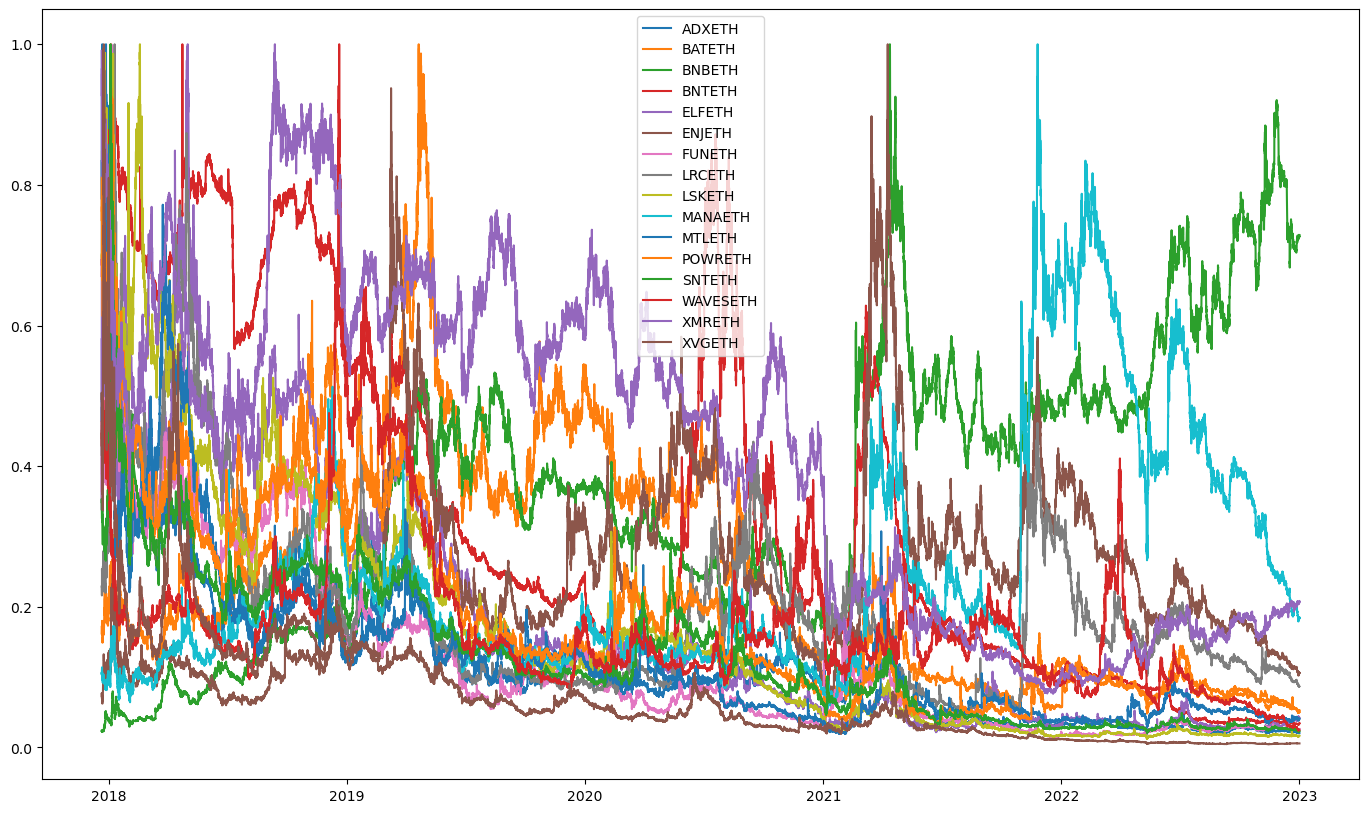

In [113]:
plt.figure(figsize=(17, 10))
for k in corr.columns[pos]: 
    print(k)
    symbol = (train[k]/np.max(train[k]))
    plt.plot(symbol, label=k)
plt.legend()
plt.show()

ADAETH
DASHETH
EOSETH
ETCETH
ETHBTC
ETHUSDT
IOTAETH
LINKETH
LTCETH
NEOETH
QTUMETH
TRXETH
XLMETH
XRPETH
ZECETH


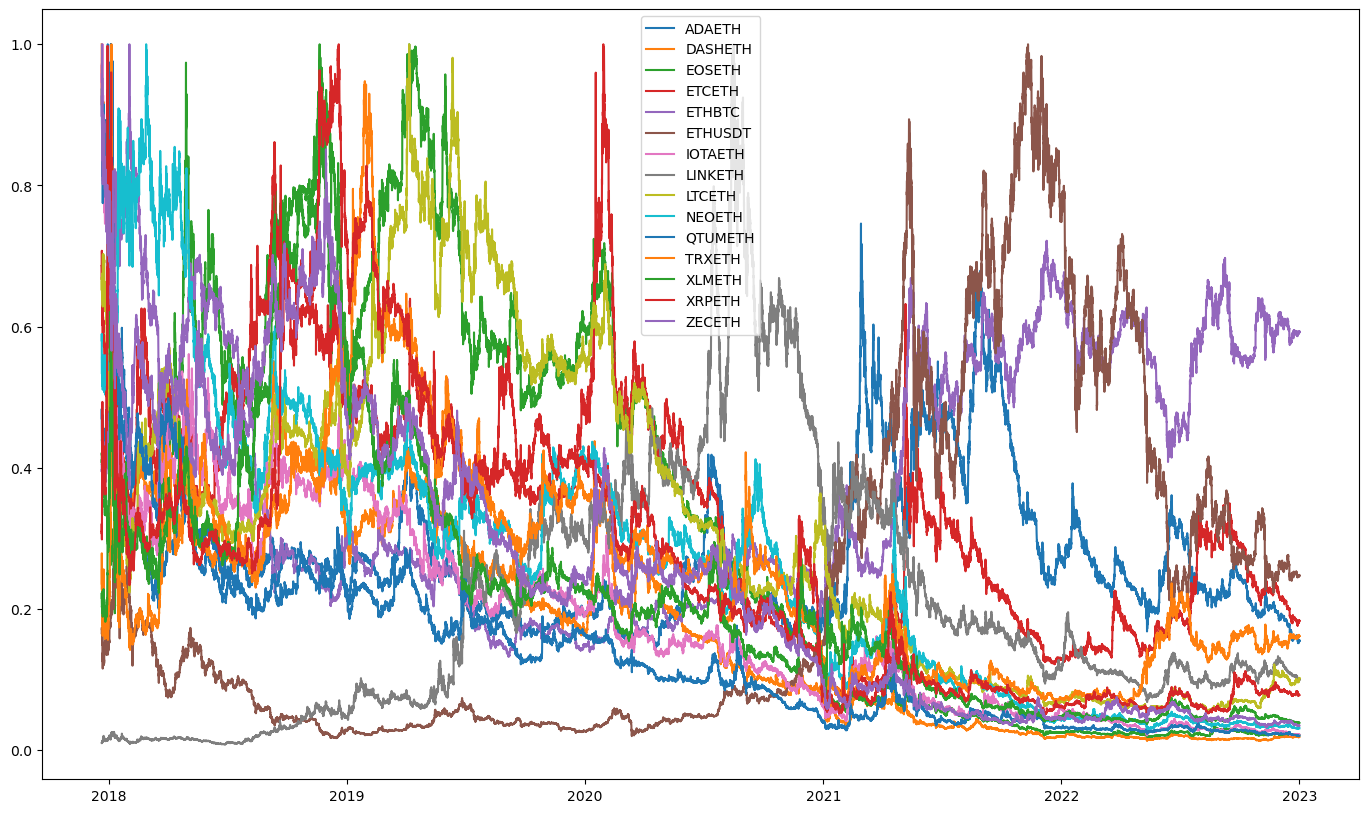

In [114]:
plt.figure(figsize=(17, 10))
for k in corr.columns[neg]: 
    print(k)
    symbol = (train[k]/np.max(train[k]))
    plt.plot(symbol, label=k)
plt.legend()
plt.show()

### Let's look at ETHBTC for example :

In [67]:
(train.values @ pca.components_[0]).shape

(43923,)

In [74]:
pca.components_

array([[-1.97334173e-01, -7.93346678e-02, -1.35857067e-01,
        -2.16728067e-01, -5.34501284e-02, -2.29430230e-01,
        -8.47491119e-02, -8.61186058e-02, -2.02129487e-01,
        -1.68938579e-01,  3.92244689e-01,  3.16170160e-01,
        -9.56180870e-02, -1.80546129e-01, -8.71197359e-02,
        -6.47919278e-02, -1.31038236e-01, -2.33343539e-01,
        -9.26324234e-02, -8.82999051e-02, -1.95029970e-01,
        -9.46458230e-02, -1.78284763e-01, -1.39153621e-01,
        -1.79522440e-01, -1.44674955e-01, -2.12724820e-01,
        -2.59991989e-01, -2.02480269e-01, -9.66002347e-02,
        -2.00052964e-01],
       [-1.67238056e-01,  2.59150737e-01,  8.24122547e-02,
         1.32169759e-01,  1.76414568e-01, -1.19760796e-01,
         2.12547933e-01,  1.25609078e-01, -2.71506244e-01,
        -2.65158520e-01, -2.27901934e-01, -3.16254745e-01,
         2.63305656e-01, -8.15758354e-02, -3.09351533e-02,
         7.66498839e-02,  1.27513101e-01, -1.60871481e-01,
         1.28496891e-01,  2.08

,Market,F1,F2
Market,1.000000,0.235206,0.304015
F1,0.235206,1.000000,0.103963
F2,0.304015,0.103963,1.000000


          Market        F1        F2
Market  1.000000  0.232256  0.302977
F1      0.232256  1.000000  0.101750
F2      0.302977  0.101750  1.000000


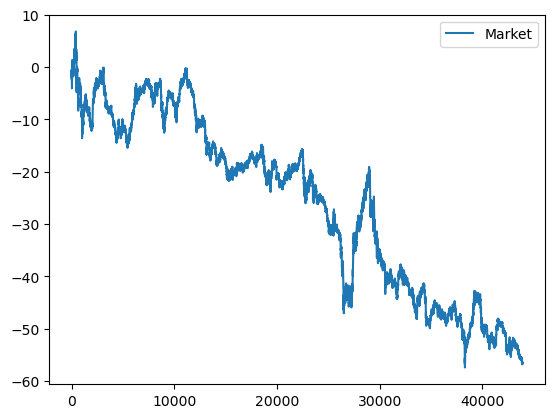

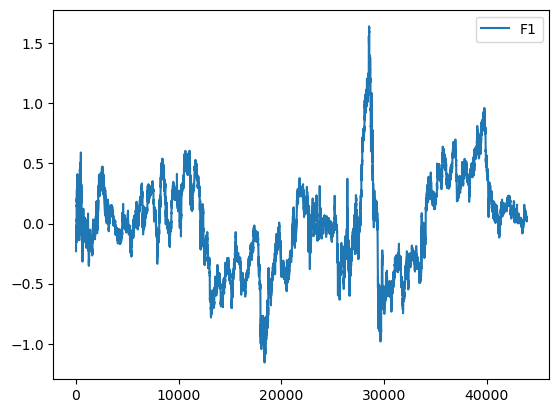

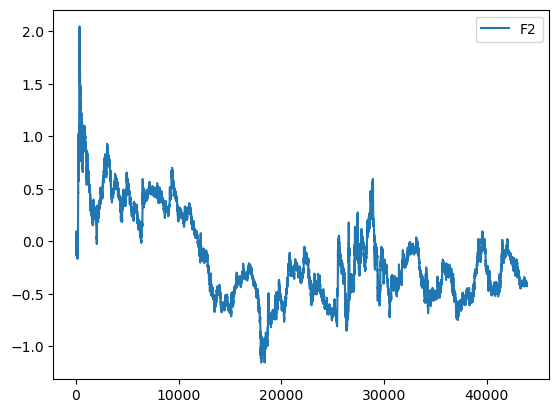

In [115]:
market = (df_returns.values @ np.ones(31))#pca.components_[0])
f1 = (df_returns.values @ pca.components_[1])
f2 = (df_returns.values @ pca.components_[2])

features = pd.DataFrame(np.array([market, f1, f2]).T, columns=["Market", 'F1', "F2"])
print(features.corr())

plt.plot(np.cumsum(market), label='Market')
plt.legend()
plt.show()
plt.plot(np.cumsum(f1), label='F1')
plt.legend()
plt.show()
plt.plot(np.cumsum(f2), label='F2')
plt.legend()
plt.show()

In [120]:
features.values

array([[-6.42376397e-01, -1.98509345e-01, -1.11502544e-02],
       [-9.15226996e-01, -3.35635208e-02, -2.90441526e-02],
       [ 6.24712524e-02,  4.15817738e-02, -5.96307033e-04],
       ...,
       [ 1.97563502e-03, -3.48796405e-03,  3.58044467e-03],
       [ 3.38259093e-03,  1.01048212e-02,  5.17015287e-04],
       [ 4.05054783e-03,  4.49730768e-03,  7.62471530e-03]])

In [119]:
df_returns['ETHBTC'].values

array([-0.00669922,  0.02112299,  0.00611561, ..., -0.00011022,
       -0.0007857 , -0.00153183])

In [121]:
import statsmodels.api as sm


x = features.values
y = df_returns['ETHBTC'].values

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     3630.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:42:18   Log-Likelihood:             1.6856e+05
No. Observations:               43922   AIC:                        -3.371e+05
Df Residuals:                   43918   BIC:                        -3.371e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.055e-06   2.49e-05     -0.324      0.7

In [125]:
sm.tsa.stattools.acf((y-predictions))

array([ 1.00000000e+00, -2.43014576e-03, -2.20851526e-02, -6.28365431e-03,
        3.38804335e-03, -3.64740734e-03,  1.28038331e-02,  7.69554657e-03,
        1.64783493e-02,  1.35946641e-02,  4.16494586e-03, -1.25937042e-03,
        1.69792465e-02,  1.43599648e-02, -2.57607665e-04,  5.94916782e-03,
        1.44080737e-02,  1.20012750e-03,  6.15369641e-03,  6.30446088e-03,
        2.57671637e-03,  1.79366294e-02,  2.03105078e-02, -7.76881738e-03,
       -3.32535069e-02, -1.23310762e-02, -4.29406935e-03, -2.45229161e-02,
       -9.38631810e-03, -5.01290349e-03,  2.29214371e-03,  8.01509452e-03,
       -6.40361069e-03, -1.78813596e-02, -1.09051531e-02, -2.33990885e-03,
        2.95912591e-03, -1.19484837e-02, -5.74866067e-03,  5.78367115e-03,
        1.19611770e-02,  6.13933067e-03, -4.81195677e-03, -9.41217592e-04,
        2.86835305e-04,  6.80760794e-03, -7.47984373e-03])

In [147]:
neutral = pd.DataFrame(y-predictions)

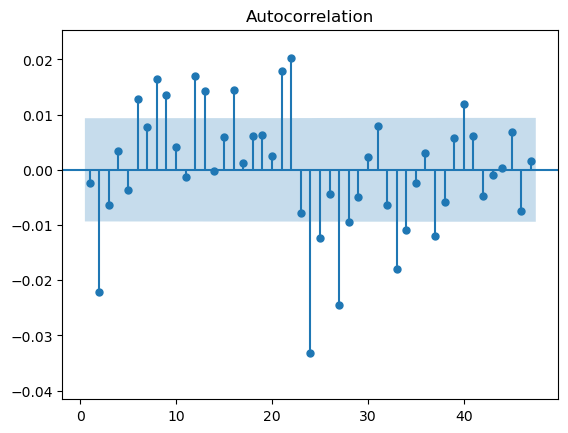

In [148]:
import statsmodels
statsmodels.graphics.tsaplots.plot_acf(neutral, zero=False, auto_ylims=True)
plt.show()

In [174]:
time_features = []
# times = [1, 2, 6, 8, 12, 18, 24, 30, 40]
times_lists = [[1, 2], [6, 7, 8, 9, 10], [24, 25, 26, 27, 28]]
for times in times_lists : 
    temp = 0 
    for t in times :
        temp += neutral.shift(t).fillna(0)
    temp /= len(times)
    time_features.append(temp)
    
time_features = pd.DataFrame(np.array(time_features).reshape(len(neutral), len(times_lists)))

In [200]:
time_features = []
# times = [1, 2, 6, 8, 12, 18, 24, 30, 40]
times_lists = [[2], [6, 7, 8, 9, 10], [24, 25, 26, 27, 28]]
time_features.append(neutral)
time_features.append(neutral.shift(1))
time_features.append(neutral.shift(2))

time_features = pd.DataFrame(np.array(time_features).reshape(len(time_features),len(neutral)).T)

time_features.corr()


,0,1,2
0,1.000000,-0.002431,-0.022097
1,-0.002431,1.000000,-0.002431
2,-0.022097,-0.002431,1.000000


In [195]:
time_features = []
# times = [1, 2, 6, 8, 12, 18, 24, 30, 40]
times_lists = [[2], [6, 7, 8, 9, 10], [24, 25, 26, 27, 28]]
time_features.append(neutral)
time_features.append(neutral.shift(1))
time_features = pd.DataFrame(np.array(time_features).reshape(len(neutral), len(time_features)))

time_features.corr()

,0,1
0,1.000000,-0.002431
1,-0.002431,1.000000


In [212]:
time_features = []
# times = [1, 2, 6, 8, 12, 18, 24, 30, 40]
times_lists = [[1, 2], [6, 7, 8, 9, 10], [24, 25, 26, 27, 28]]

for times in times_lists : 
    temp = 0 
    print(times)
    for t in times :
        temp += neutral.shift(t)#.fillna(0)
    temp /= len(times)
    time_features.append(temp)
    
time_features = pd.DataFrame(np.array(time_features).reshape(len(time_features),len(neutral)).T)
time_features=time_features.fillna(0)
print(time_features.corr())

x = time_features.values
y = neutral.values

# x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

[1, 2]
[6, 7, 8, 9, 10]
[24, 25, 26, 27, 28]
          0         1         2
0  1.000000  0.027382 -0.039237
1  0.027382  1.000000  0.037296
2 -0.039237  0.037296  1.000000
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              37.71
Date:                Sat, 22 Jul 2023   Prob (F-statistic):                    2.51e-24
Time:                        19:00:54   Log-Likelihood:                      1.6862e+05
No. Observations:               43922   AIC:                                 -3.372e+05
Df Residuals:                   43919   BIC:                                 -3.372e+05
Df Model:                           3                                                  
Covariance Type:            nonrobu

In [215]:
predictions.shape, neutral.values.shape

((43922,), (43922, 1))

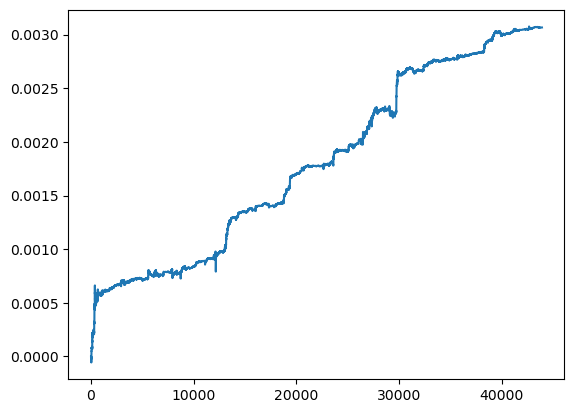

In [218]:
plt.plot(np.cumsum(predictions*neutral.values.flatten()))
plt.show()

In [221]:
hourly_pnl = (predictions*neutral.values.flatten())

In [224]:
sr = 16*5*hourly_pnl.mean()/hourly_pnl.std()
print(sr)

2.2977632078900094


In [226]:
ser_predictions = pd.Series(predictions)
ser_predictions.index = neutral.index

In [231]:
(ser_predictions - (ser_predictions*neutral.iloc[:, 0]).shift()).abs().sum()/ser_predictions.abs().sum()

0.9998983573065281

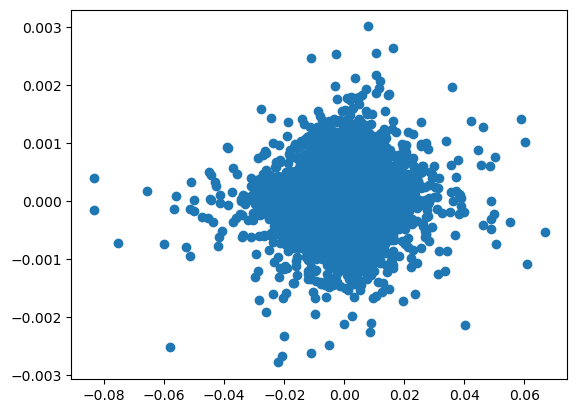

In [219]:
plt.scatter(y, predictions)
plt.show()

## Create portofolio :0 

In [235]:
model.params

array([-0.12656549,  0.00569805,  0.00047798])

ADAETH
[ 0.0319614  -0.15689421  0.21008303]


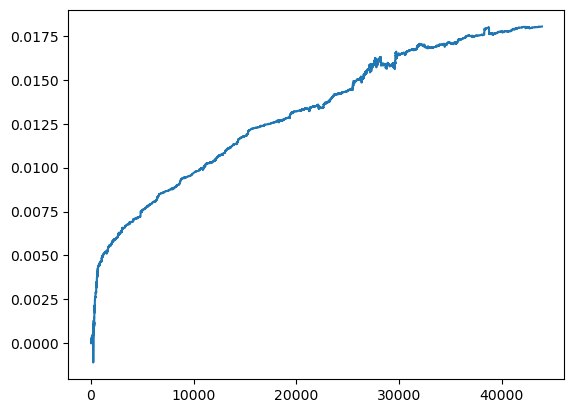

ADXETH
[-0.00162014 -0.00416478  0.06065888]


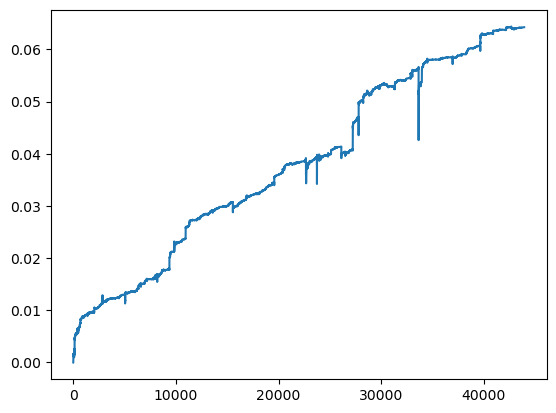

BATETH
[ 0.00327781 -0.01282443  0.0103127 ]


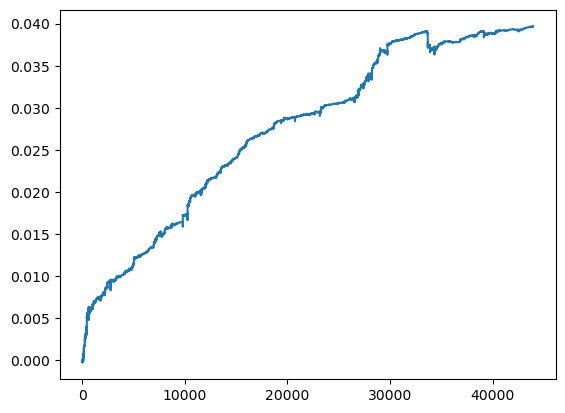

BNBETH
[ 0.00147317  0.0030002  -0.00540784]


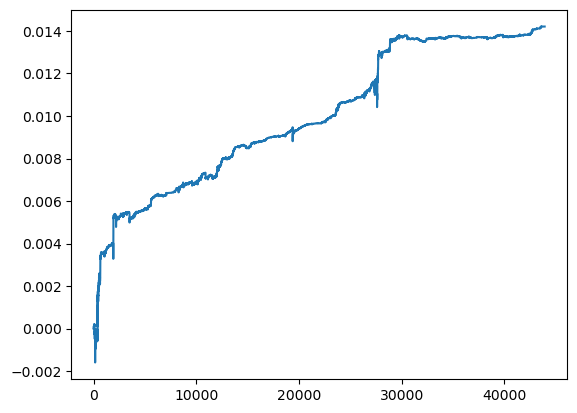

BNTETH
[-0.0072662   0.0089666  -0.00121477]


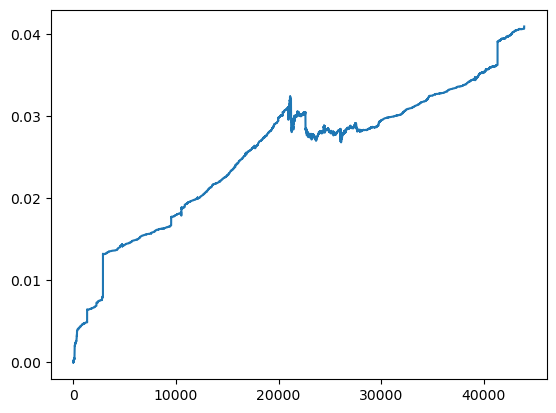

DASHETH
[ 0.01304131 -0.00370106  0.00919579]


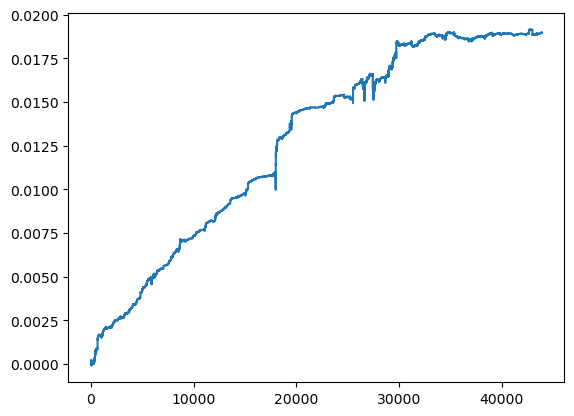

ELFETH
[ 0.01366448  0.04952824 -0.01446364]


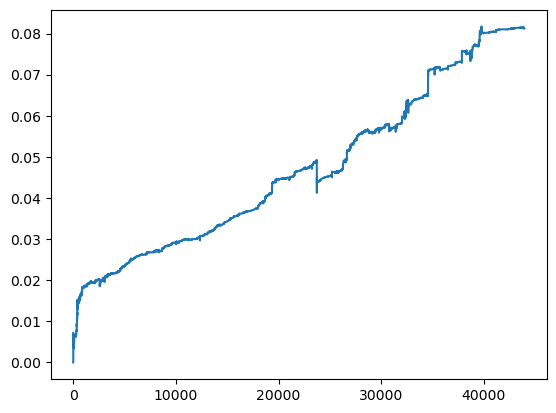

ENJETH
[ 0.00964032  0.00597489 -0.01088174]


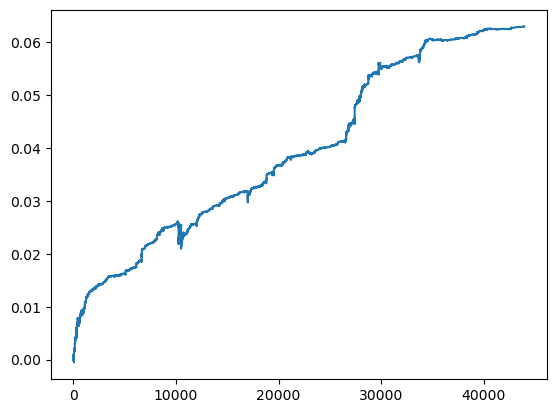

EOSETH
[-0.0034448   0.0081549  -0.00358025]


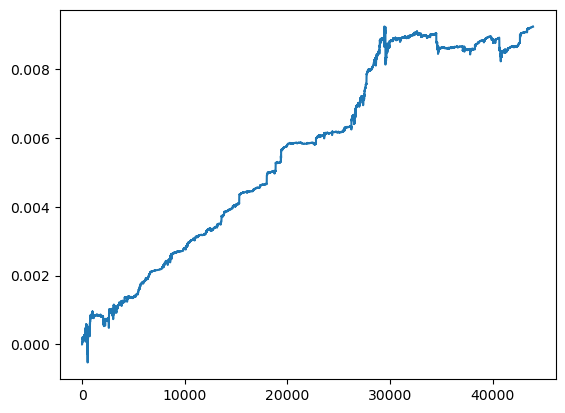

ETCETH
[-0.03304092 -0.03390802 -0.00763906]


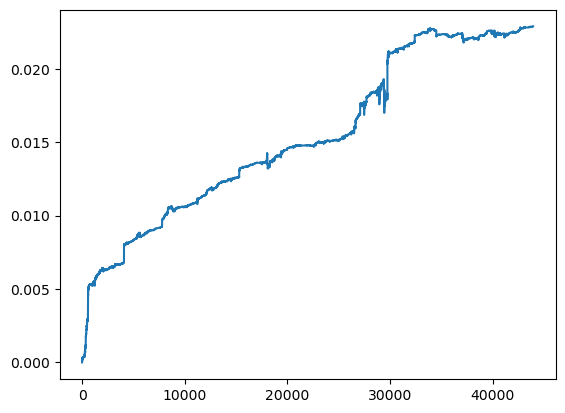

ETHBTC
[ 0.01402851  0.00537673 -0.01500976]


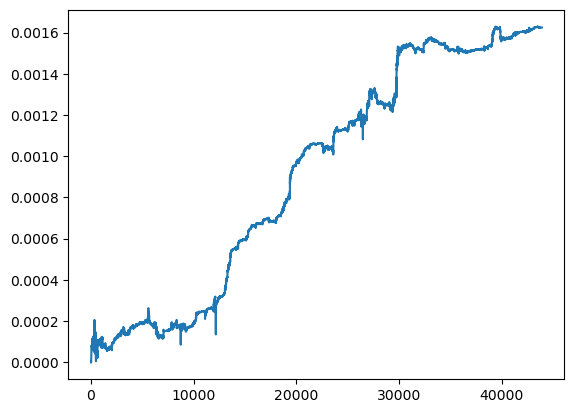

ETHUSDT
[-0.02305311  0.05639493 -0.06239211]


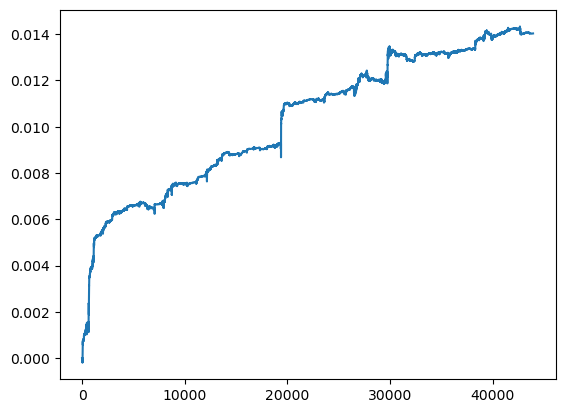

FUNETH
[ 0.08013557 -0.02395494 -0.04208224]


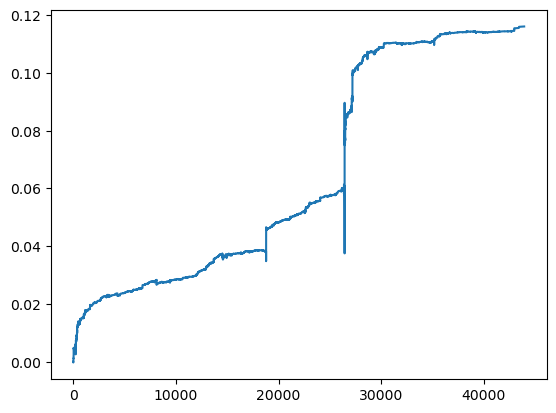

IOTAETH
[ 0.00764028 -0.00845975  0.01583086]


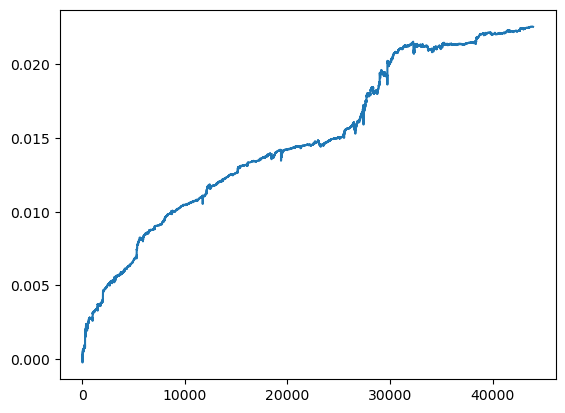

LINKETH
[-5.11891266e-03  3.91379338e-05 -7.63543260e-03]


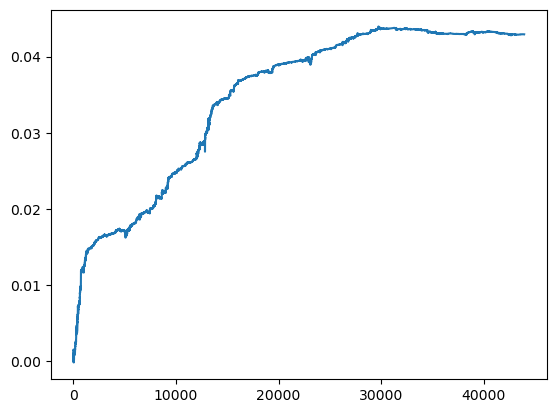

LRCETH
[-0.00475719  0.03097127 -0.02284368]


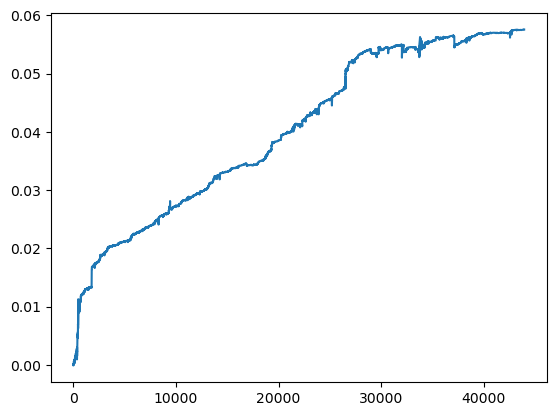

LSKETH
[ 0.0114557  -0.01347073  0.00751247]


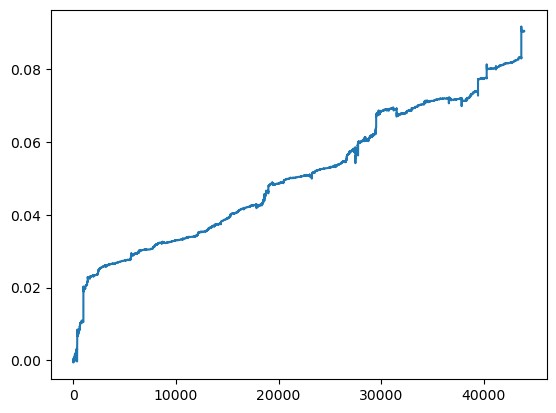

LTCETH
[0.00177214 0.00836371 0.01817031]


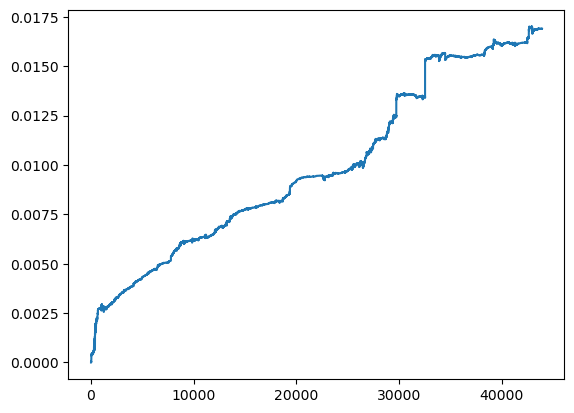

MANAETH
[-0.06915777 -0.00743451  0.03172668]


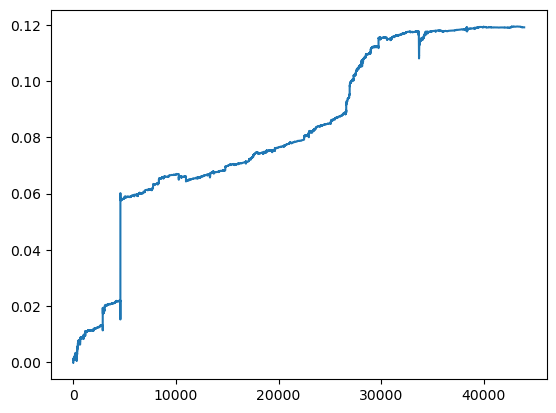

MTLETH
[-0.00981642  0.00887666 -0.01283503]


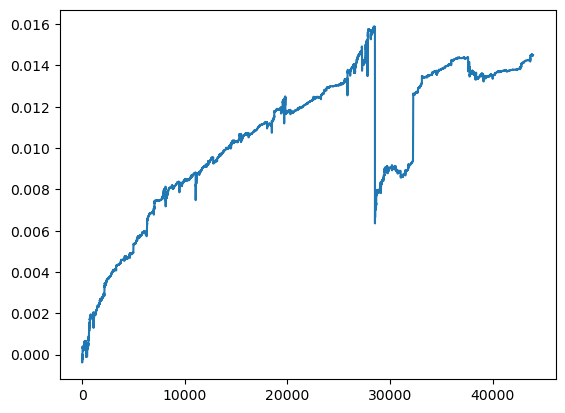

NEOETH
[-0.00394674 -0.00561706 -0.02333133]


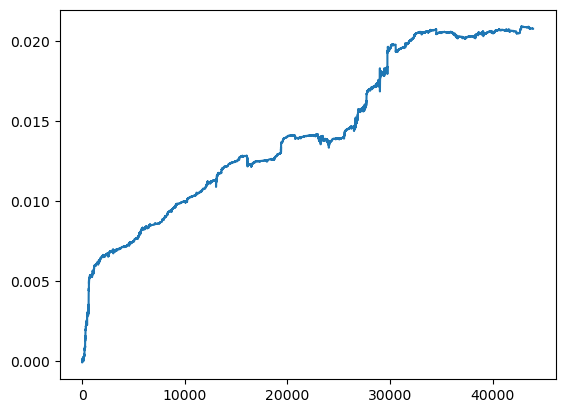

POWRETH
[ 0.01825218  0.0078672  -0.02077025]


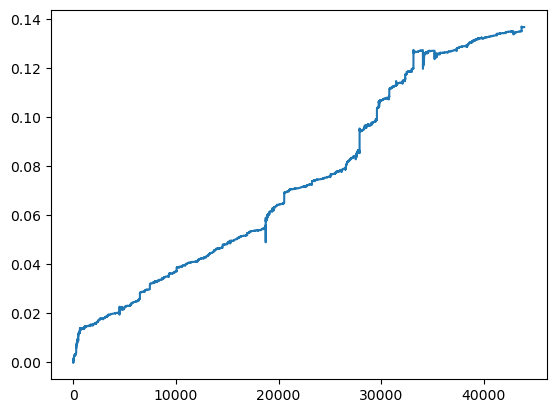

QTUMETH
[ 0.0051911  -0.01773356 -0.00216022]


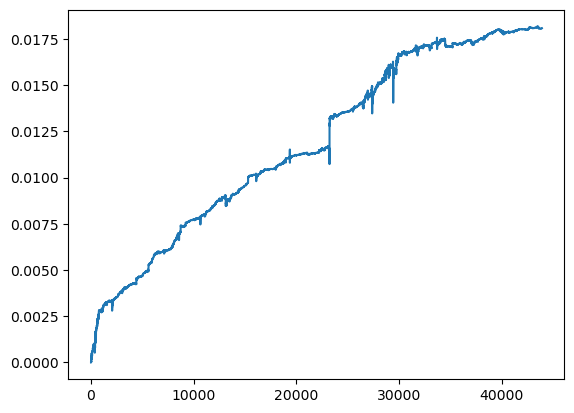

SNTETH
[ 0.04996031 -0.02683986 -0.02282671]


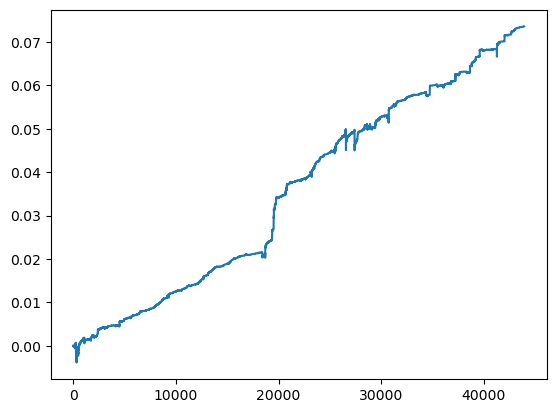

TRXETH
[0.004509   0.00502123 0.02001815]


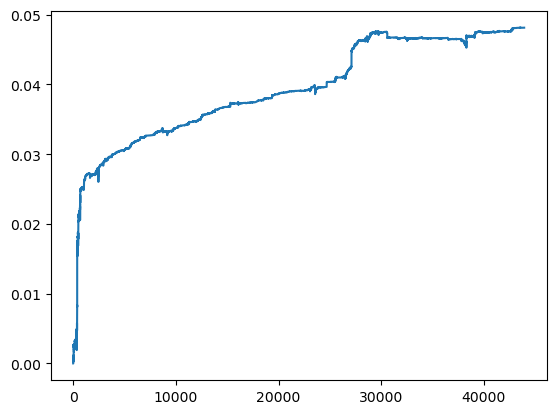

WAVESETH
[ 0.01856328 -0.01573288 -0.03254059]


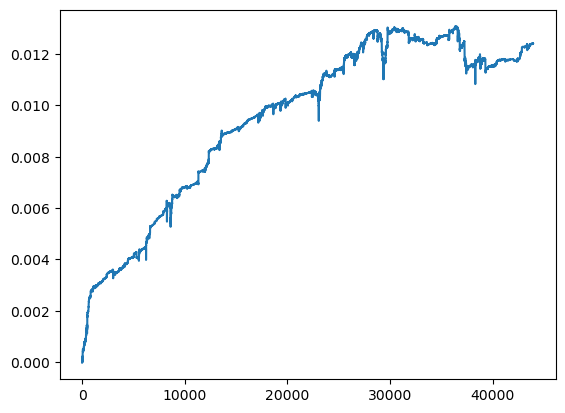

XLMETH
[-0.01231408 -0.01141718 -0.0042576 ]


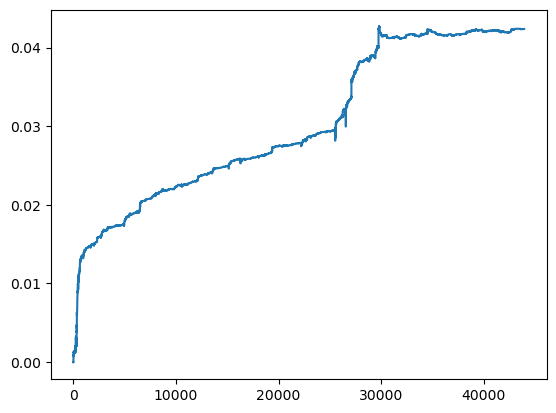

XMRETH
[-0.0154416  -0.0080477   0.00318505]


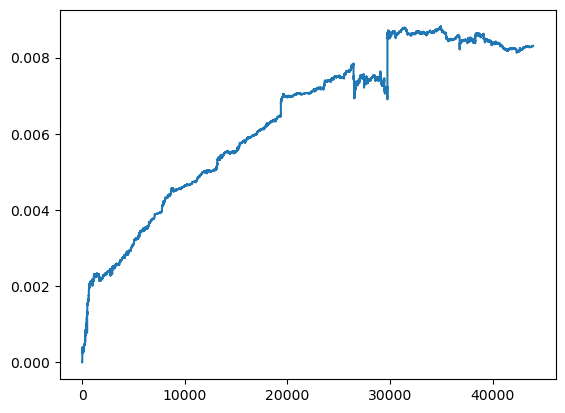

XRPETH
[-0.02165103 -0.0077751  -0.0308447 ]


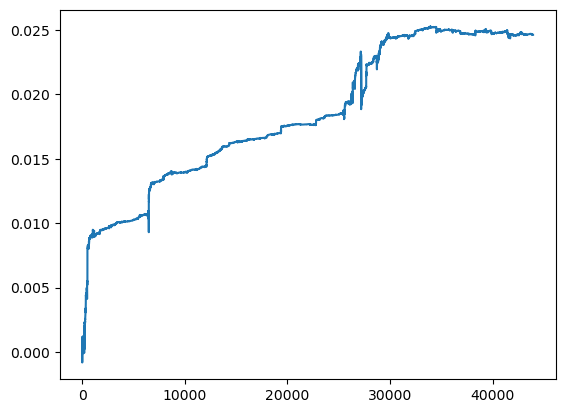

XVGETH
[0.01020314 0.03779053 0.02399742]


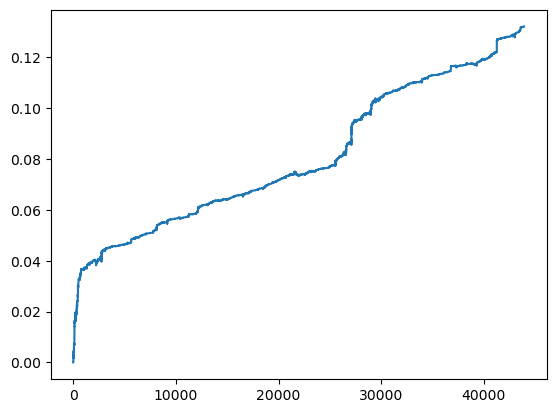

ZECETH
[-0.01308619 -0.00254666  0.00090933]


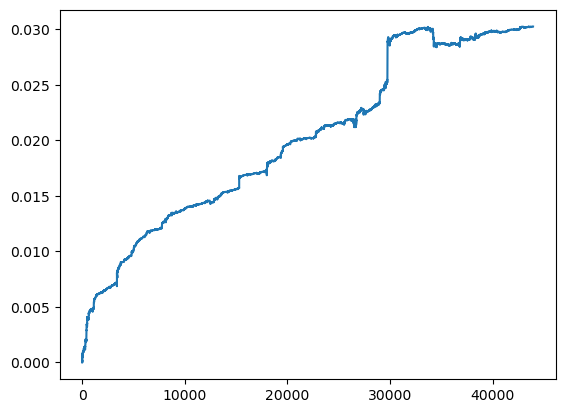

In [236]:
beta = 0
alpha = np.ones(31)
x = features.values
for k in df_returns.keys():
    print(k)
    y = df_returns[k].values
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 
    print_model = model.summary()
    beta += model.params
    print(model.params)
    
    neutral = pd.DataFrame(y-predictions)
#     statsmodels.graphics.tsaplots.plot_acf(neutral, zero=False, auto_ylims=True)
#     plt.show()
    
    time_features = []
    times_lists = [[1, 2], [6, 7, 8, 9, 10], [24, 25, 26, 27, 28]]

    for times in times_lists : 
        temp = 0 
        for t in times :
            temp += neutral.shift(t)
        temp /= len(times)
        time_features.append(temp)

    time_features = pd.DataFrame(np.array(time_features).reshape(len(time_features),len(neutral)).T)
    time_features=time_features.fillna(0)

    x = time_features.values
    y = neutral.values

    model = sm.OLS(y, x).fit()
    predictions = model.predict(x) 

    print_model = model.summary()
    plt.plot(np.cumsum(predictions*neutral.values.flatten()))
    plt.show()

In [237]:
beta

array([ 0.07105459, -0.12419623,  0.06888377])